# Feature Selection Notebook
This notebook performs feature selection to identify the most important features for heart disease prediction.

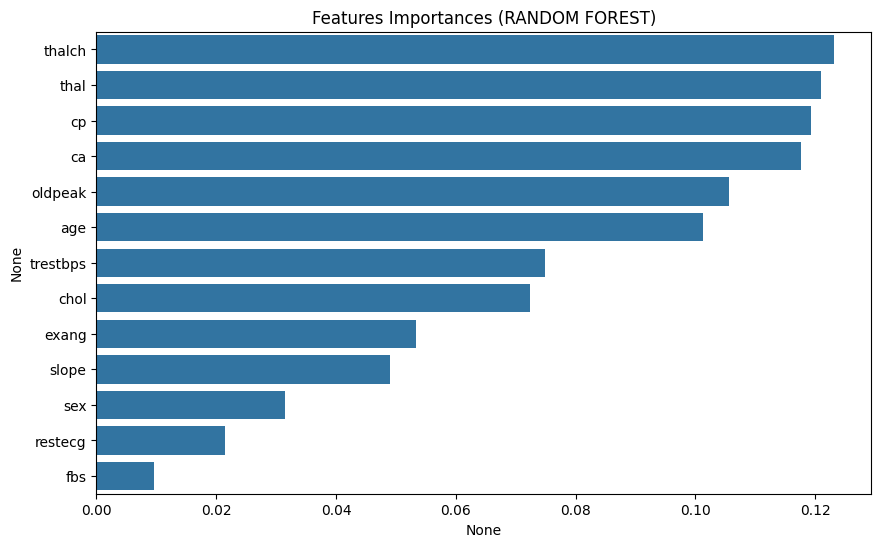


Top features (Random Forest):
thalch      0.123176
thal        0.120980
cp          0.119219
ca          0.117524
oldpeak     0.105544
age         0.101294
trestbps    0.074835
chol        0.072463
exang       0.053397
slope       0.048968
dtype: float64

Top 5 features (RFE): 
['sex', 'cp', 'exang', 'slope', 'ca']

Top 5 features (Chi-Square Test):
['exang', 'oldpeak', 'slope', 'ca', 'thal']

Final selected features (appeared in >=2 methods):
['thal', 'oldpeak', 'exang', 'ca', 'cp', 'slope']

✅ Reduced dataset saved as heart_selected_features.csv


,thal,oldpeak,exang,ca,cp,slope,target
0,6.0,2.3,0,0.0,1,3,0
1,3.0,1.5,1,3.0,4,2,1
2,7.0,2.6,1,2.0,4,2,1
3,3.0,3.5,0,0.0,3,3,0
4,3.0,1.4,0,0.0,2,1,0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("../data/cleaned_heart_binary.csv")

X = df.drop("target", axis=1)
y = df["target"]

# -----------------------------
# 2. Feature Importance (RANDOM FOREST)
# -----------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Features Importances (RANDOM FOREST)")
plt.show()

print("\nTop features (Random Forest):")
print(feat_importances.head(10))


# -----------------------------
# 3. Recursive Feature Elimination (RFE)
# -----------------------------
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

rfe_features = list(X.columns[rfe.support_])
print("\nTop 5 features (RFE): ")
print(rfe_features)


# -----------------------------
# 4. Chi-Sqaure Test
# -----------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_scaled, y)

chi2_features = X.columns[chi2_selector.get_support()]

print("\nTop 5 features (Chi-Square Test):")
print(list(chi2_features))

# -----------------------------
# 5. Combined Results
# -----------------------------

# Convert everything to lists
chi2_features = list(chi2_features)
all_selected = rfe_features + chi2_features + list(feat_importances.head(5).index)

final_features = [f for f in set(all_selected) if all_selected.count(f) >= 2]

print("\nFinal selected features (appeared in >=2 methods):")
print(final_features)


# -----------------------------
# 6. Save reduced dataset
# -----------------------------
df_selected = df[final_features + ["target"]]
df_selected.to_csv("../data/heart_selected_features.csv", index=False)

print("\n✅ Reduced dataset saved as heart_selected_features.csv")
display(df_selected.head())
